In [1]:
import random as ran
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math

In [2]:
h=1
tmax=100
tpoints=np.arange(0,tmax+1,h)

sample=10000
s_points=np.arange(0,sample+1,h)

In [3]:
first=1
p_same=3/4
p_change=1/4

In [4]:
ele=first
pos=first
position=[]

In [5]:
up=2
down=-2
right=1
left=-1

In [6]:
# loop for capture possibility
for i in s_points:
    position.append(pos)
    ele = 1
    # 2nd move        
    if ran.random() > p_change:
        ele += right
        test = right
    else:
        if ran.random() > 1/2:
            ele += 0*up
            test = up
        else:
            ele += 0*down
            test = down
    # 3rd move  
    if test == right:
        if ran.random() > p_change:
            ele += right
            test = right
        else:
            if ran.random() > 1/2:
                ele += 0*up
                test = up
            else:
                ele += 0*down
                test = down
    else:
        if test == up:
            if ran.random() > p_change:
                ele += 0*up
                test = up
            else:
                if ran.random() > 1/2:
                    ele += left
                    test = left
                else:
                    ele += right
                    test = right
        else:
            if test == down:
                if ran.random() > p_change:
                    ele += 0*down
                    test = down
                else:
                    if ran.random() > 1/2:
                        ele += left
                        test = left
                    else:
                        ele += right
                        test = right
        # 4th and later move
        for t in range(3,tmax+1):
            if test == right:
                if ran.random() > p_change:
                    ele += right
                    test = right
                else:
                    if ran.random() > 1/2:
                        ele += 0*up
                        test = up
                    else:
                        ele += 0*down
                        test = down
            else:
                if test == up:
                    if ran.random() > p_change:
                        ele += 0*up
                        test = up
                    else:
                        if ran.random() > 1/2:
                            ele += left
                            test = left
                        else:
                            ele += right
                            test = right
                else:
                    if test == down:
                        if ran.random() > p_change:
                            ele += 0*down
                            test = down
                        else:
                            if ran.random() > 1/2:
                                ele += left
                                test = left
                            else:
                                ele += right
                                test = right
                    else:
                        if test == left:
                            if ran.random() > p_change:
                                ele += left
                                test = left
                            else:
                                if ran.random() > 1/2:
                                    ele += 0*up
                                    test = up
                                else:
                                    ele += 0*down
                                    test = down
    pos = ele


In [7]:
print(position)

[1, 3, 3, 2, 7, 0, 3, -14, 2, 3, 2, -13, 2, 2, 3, 3, 3, 3, 3, 3, -7, -5, 3, 2, 2, 3, 3, 3, 3, 3, -18, 3, -22, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, -14, 3, 3, 2, 3, -13, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 32, 3, 3, 3, 2, 3, -5, 14, -11, 3, 3, 3, 22, 3, 3, 2, 2, 3, 2, 3, -41, 2, 3, 2, 2, 3, -10, -7, 3, -2, 26, 2, 3, 12, 3, 2, 3, 2, 2, 3, 3, -19, -32, 21, 3, 8, 3, -7, -3, 3, 3, -1, 3, 9, 2, 3, -7, 3, 3, 45, 3, 3, 3, 2, 3, -4, 3, 3, 3, 3, -8, 3, 3, 2, 2, 31, 3, 3, 3, -6, 2, 2, 3, -23, 3, 3, 4, 2, 3, 26, 2, -27, 2, 2, -13, 2, -7, 3, 3, 3, -20, 2, 2, 3, 3, 3, 3, 3, 3, 3, 7, 41, 2, 3, -17, 3, 3, 3, 3, 3, 8, 3, -7, 3, 3, 3, 2, 3, 3, 3, -12, 3, 0, 3, 3, 3, 20, 3, -9, 3, 3, 3, 3, 3, 2, 3, 2, 14, 3, 2, 3, 2, -3, 2, 2, 2, 2, -23, -1, 3, 3, 3, 20, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, -9, 3, 3, 2, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 3, 3, 3, -17, 3, 3, 3, 3, 3, 2, 17, 3, 3, 3, 13, 3, 8, 2, 3, 3, -35, 2, 3, 3, -5, 3, 3, -9, 3, 2, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 24, 3, 3, -14, 3, 2, 3, 3, 9, 3, 13, 3, 3, 2,

In [8]:
position=position[1:sample+1]
print(len(position))

10000


In [9]:
reactor=[]
capture=[]
through=[]

num_r=0
num_c=0
num_t=0

size=np.arange(0,tmax+1,h)
print(len(size))

101


In [10]:
for j in range(tmax+1):
    reactor.append(num_r)
    capture.append(num_c)
    through.append(num_t)
    x = size[j]
    nt=0
    nc=0
    nr=0
    for i in range(sample):
        if position[i] > x:
            nt += 1
        elif position[i] > 0:
            nc += 1
        else:
            nr += 1
    if nr == 0:
        num_r = 0.001
    else:
        num_r = nr
    if nc == 0:
        num_c = 0.001
    else:
        num_c = nc
    if nt == 0:
        num_t = 0.001
    else:
        num_t = nt

In [11]:
reactor_n=reactor[1:tmax+1]
capture_n=capture[1:tmax+1]
through_n=through[1:tmax+1]

In [12]:
print(reactor_n)
print(len(reactor_n))

[1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213, 1213]
100


In [13]:
print(capture_n)
print(len(capture_n))

[0.001, 47, 1964, 7643, 7707, 7760, 7813, 7865, 7926, 7978, 8019, 8059, 8103, 8150, 8196, 8243, 8278, 8321, 8361, 8402, 8432, 8457, 8495, 8522, 8547, 8564, 8585, 8601, 8622, 8639, 8654, 8667, 8688, 8701, 8713, 8720, 8725, 8734, 8739, 8743, 8752, 8756, 8758, 8765, 8769, 8772, 8774, 8778, 8780, 8780, 8782, 8782, 8783, 8784, 8784, 8784, 8785, 8786, 8786, 8786, 8786, 8786, 8786, 8786, 8786, 8786, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787, 8787]
100


In [14]:
print(through_n)
print(len(through_n))

[8787, 8740, 6823, 1144, 1080, 1027, 974, 922, 861, 809, 768, 728, 684, 637, 591, 544, 509, 466, 426, 385, 355, 330, 292, 265, 240, 223, 202, 186, 165, 148, 133, 120, 99, 86, 74, 67, 62, 53, 48, 44, 35, 31, 29, 22, 18, 15, 13, 9, 7, 7, 5, 5, 4, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
100


In [15]:
size=size[1:tmax+1]
print(size)
print(len(size))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
100


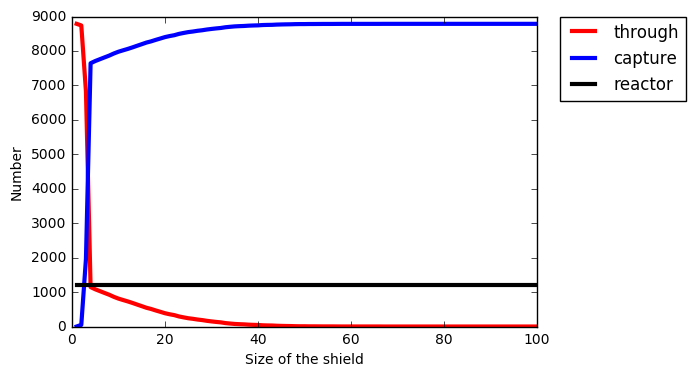

In [16]:
size_array=np.array(size)
through_array=np.array(through_n)
capture_array=np.array(capture_n)
reactor_array=np.array(reactor_n)
plt.plot(size_array,through_array,'-',label='through',color='red',linewidth=3.0)
plt.plot(size_array,capture_array,'-',label='capture',color='blue',linewidth=3.0)
plt.plot(size_array,reactor_array,'-',label='reactor',color='black',linewidth=3.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Size of the shield')
plt.ylabel('Number')
plt.show()





In [17]:
P_through=through_array/sample
P_capture=capture_array/sample
P_reactor=reactor_array/sample

In [18]:
m_through,b_through=np.polyfit(size,np.log(P_through),1)
print(m_through,b_through)


fit_t=m_through*size+b_through
uncertainty_t=(1/tmax)*np.sum((fit_t-np.log(P_through))**2)#Standard Deviation
print(math.sqrt(uncertainty_t))

-0.186364725877 0.57371850772
1.6238954476152572


In [19]:
m_capture,b_capture=np.polyfit(size,np.log(P_capture),1)
print(m_capture,b_capture)


fit_c=m_capture*size+b_capture
uncertainty_c=(1/tmax)*np.sum((fit_t-np.log(P_capture))**2)#Standard Deviation
print(math.sqrt(uncertainty_c))

0.0142231216093 -1.09368196831
10.380819087083841


In [20]:
m_reactor,b_reactor=np.polyfit(size,np.log(P_reactor),1)
print(m_reactor,b_reactor)


fit_t=m_reactor*size+b_reactor
uncertainty_r=(1/tmax)*np.sum((fit_t-np.log(P_reactor))**2)#Standard Deviation
print(math.sqrt(uncertainty_r))

6.10769185202e-18 -2.10948846303
3.552713678800501e-16
